In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('data/Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

<Axes: >

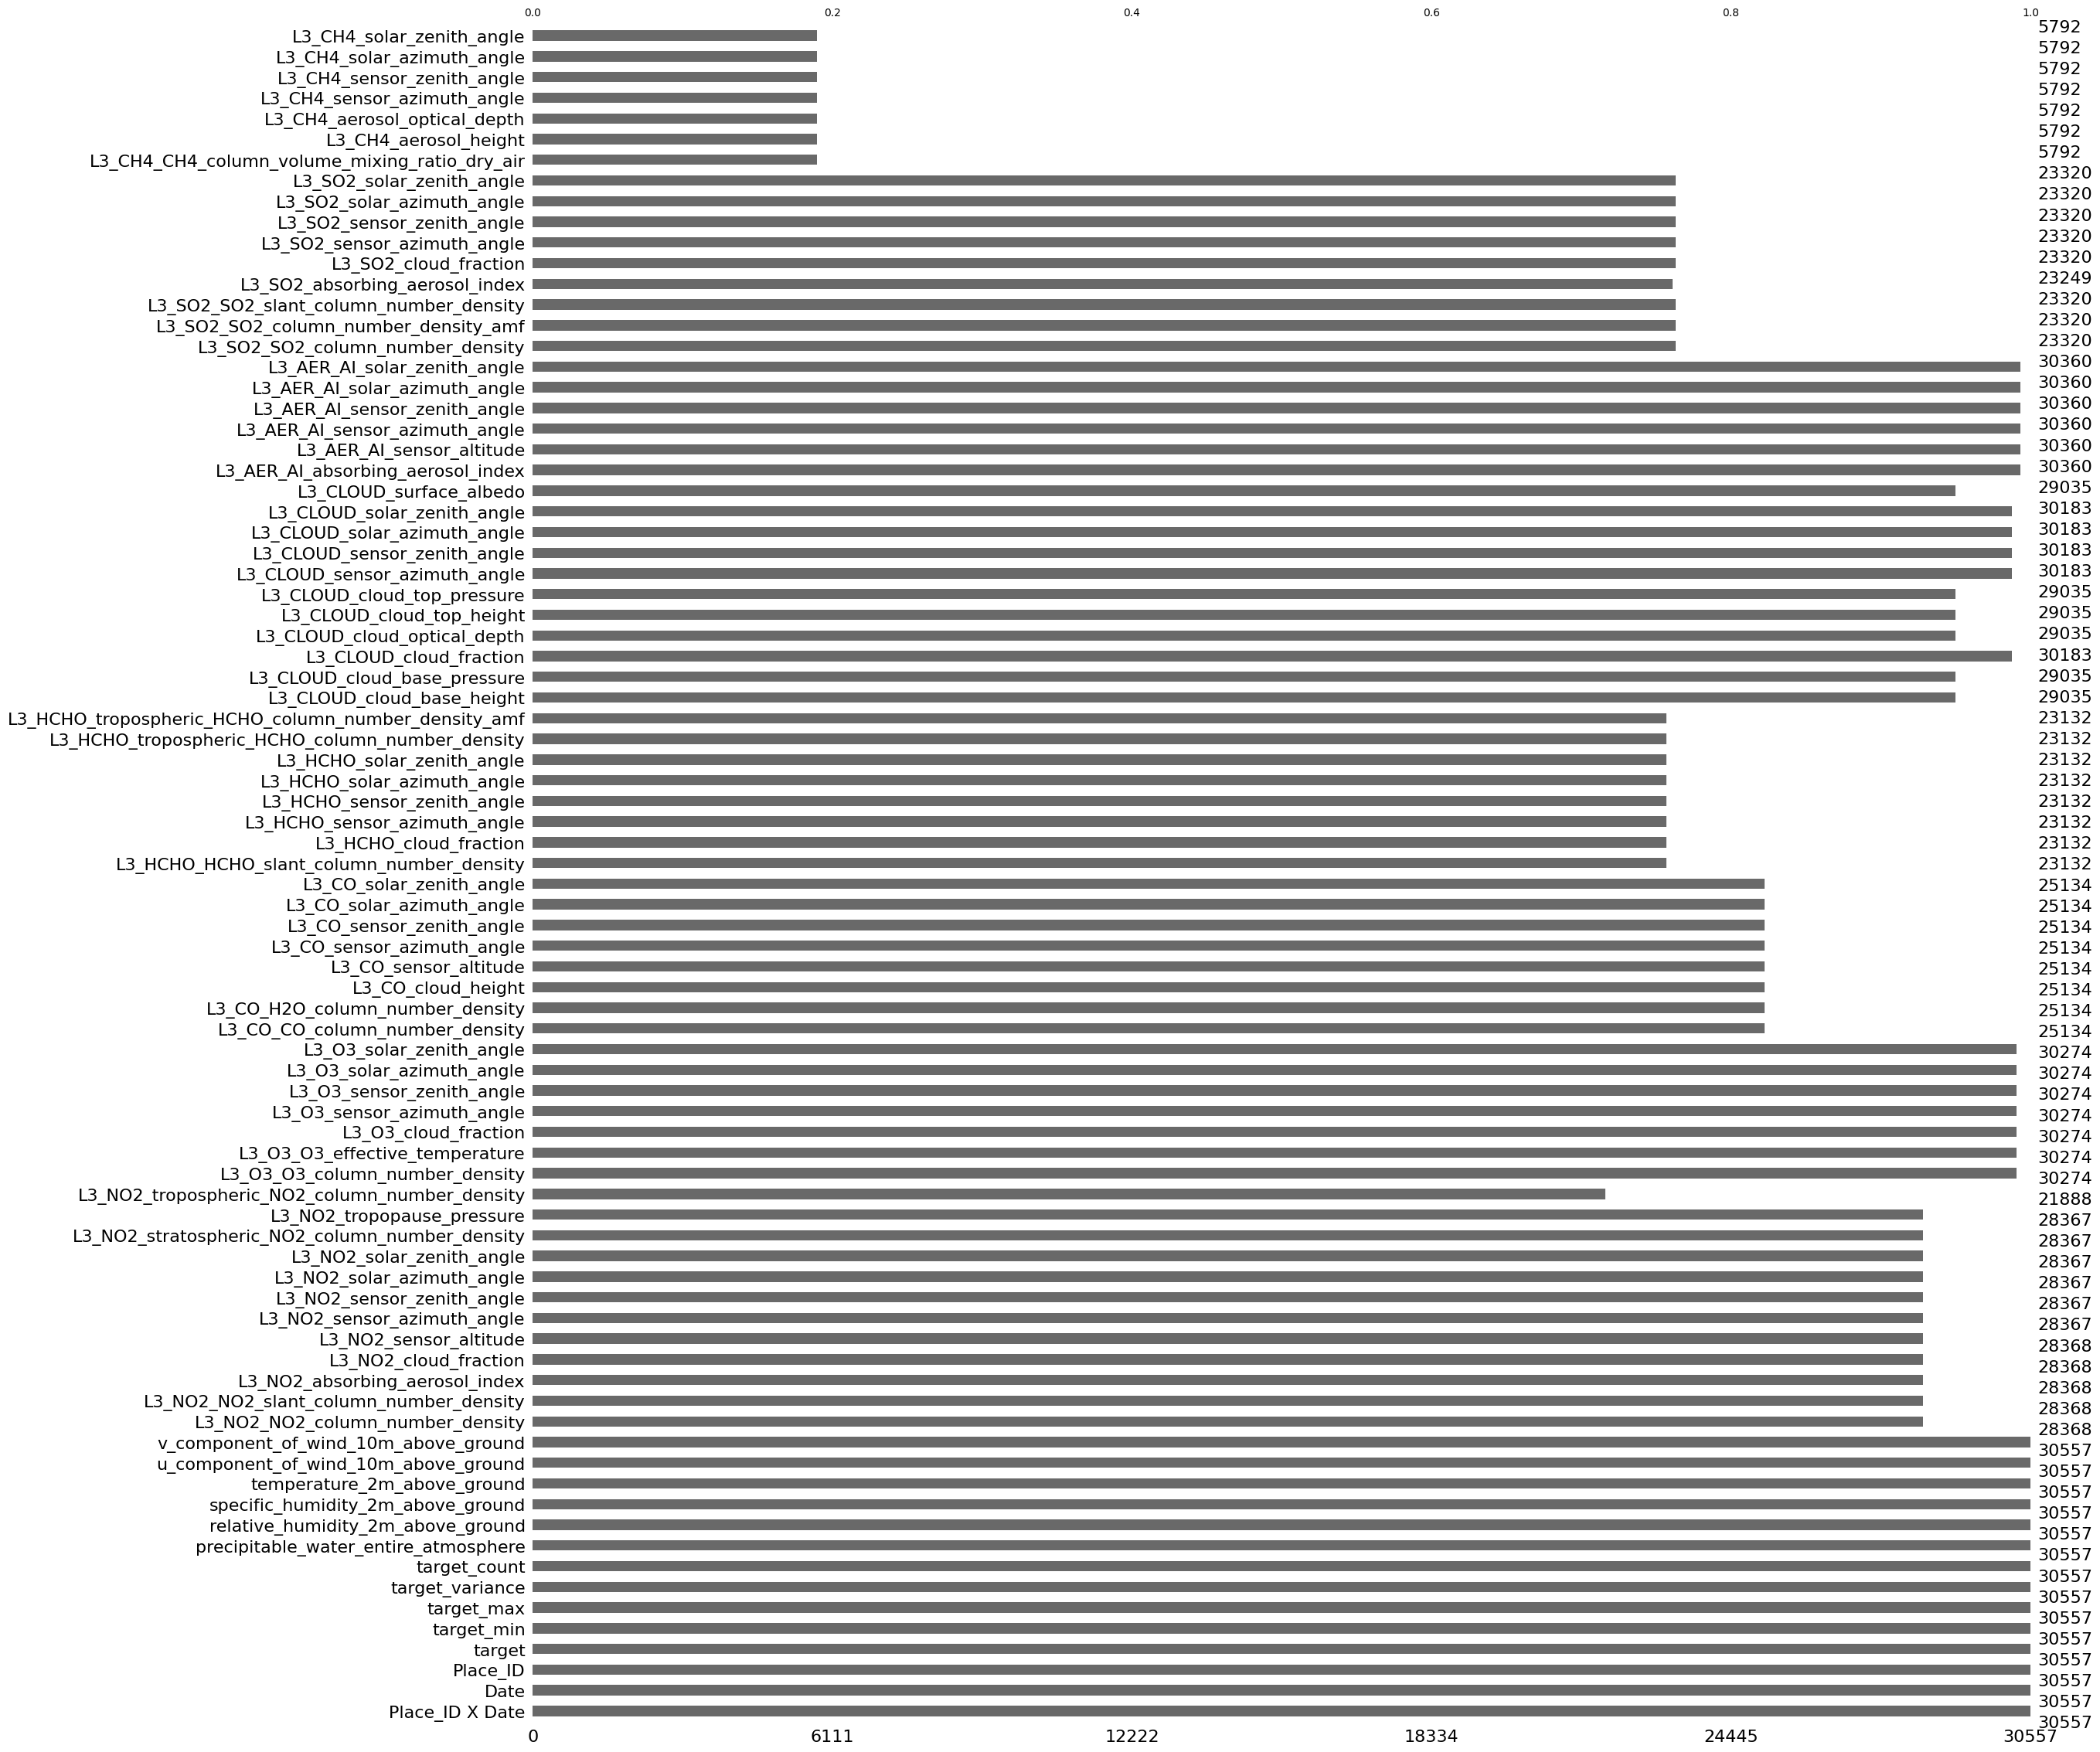

In [5]:
msno.bar(df)

In [ ]:
df_copy = df.drop()

In [8]:
df_copy = df.drop(columns=df.filter(like='angle').columns)
df_copy

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,-1.231330,840209.874619,-0.000127,0.312521,-0.000040,-1.861476,0.000000,1793.793579,3227.855469,0.010579
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,-1.082553,840772.941995,0.000150,0.433957,0.000050,-1.452612,0.059433,1789.960449,3384.226562,0.015104
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,-1.001241,841410.713456,0.000150,0.356925,0.000053,-1.572950,0.082063,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,-0.777023,841103.242368,0.000227,0.584522,0.000110,-1.239317,0.121261,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.366324,840763.055499,0.000390,0.408047,0.000159,0.202489,0.037919,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,-1.412609,833637.575687,0.000312,0.203573,0.000063,-1.953480,0.001310,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,-1.448509,833894.342749,0.000362,0.234613,0.000090,-2.178236,0.007644,1863.555567,3475.020107,0.052920
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,-1.722478,833286.230217,0.000107,0.263715,0.000031,-2.365827,0.025447,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,-2.042785,833480.959689,0.000014,0.546447,-0.000008,-2.784346,0.153445,NaN,NaN,NaN


<Axes: >

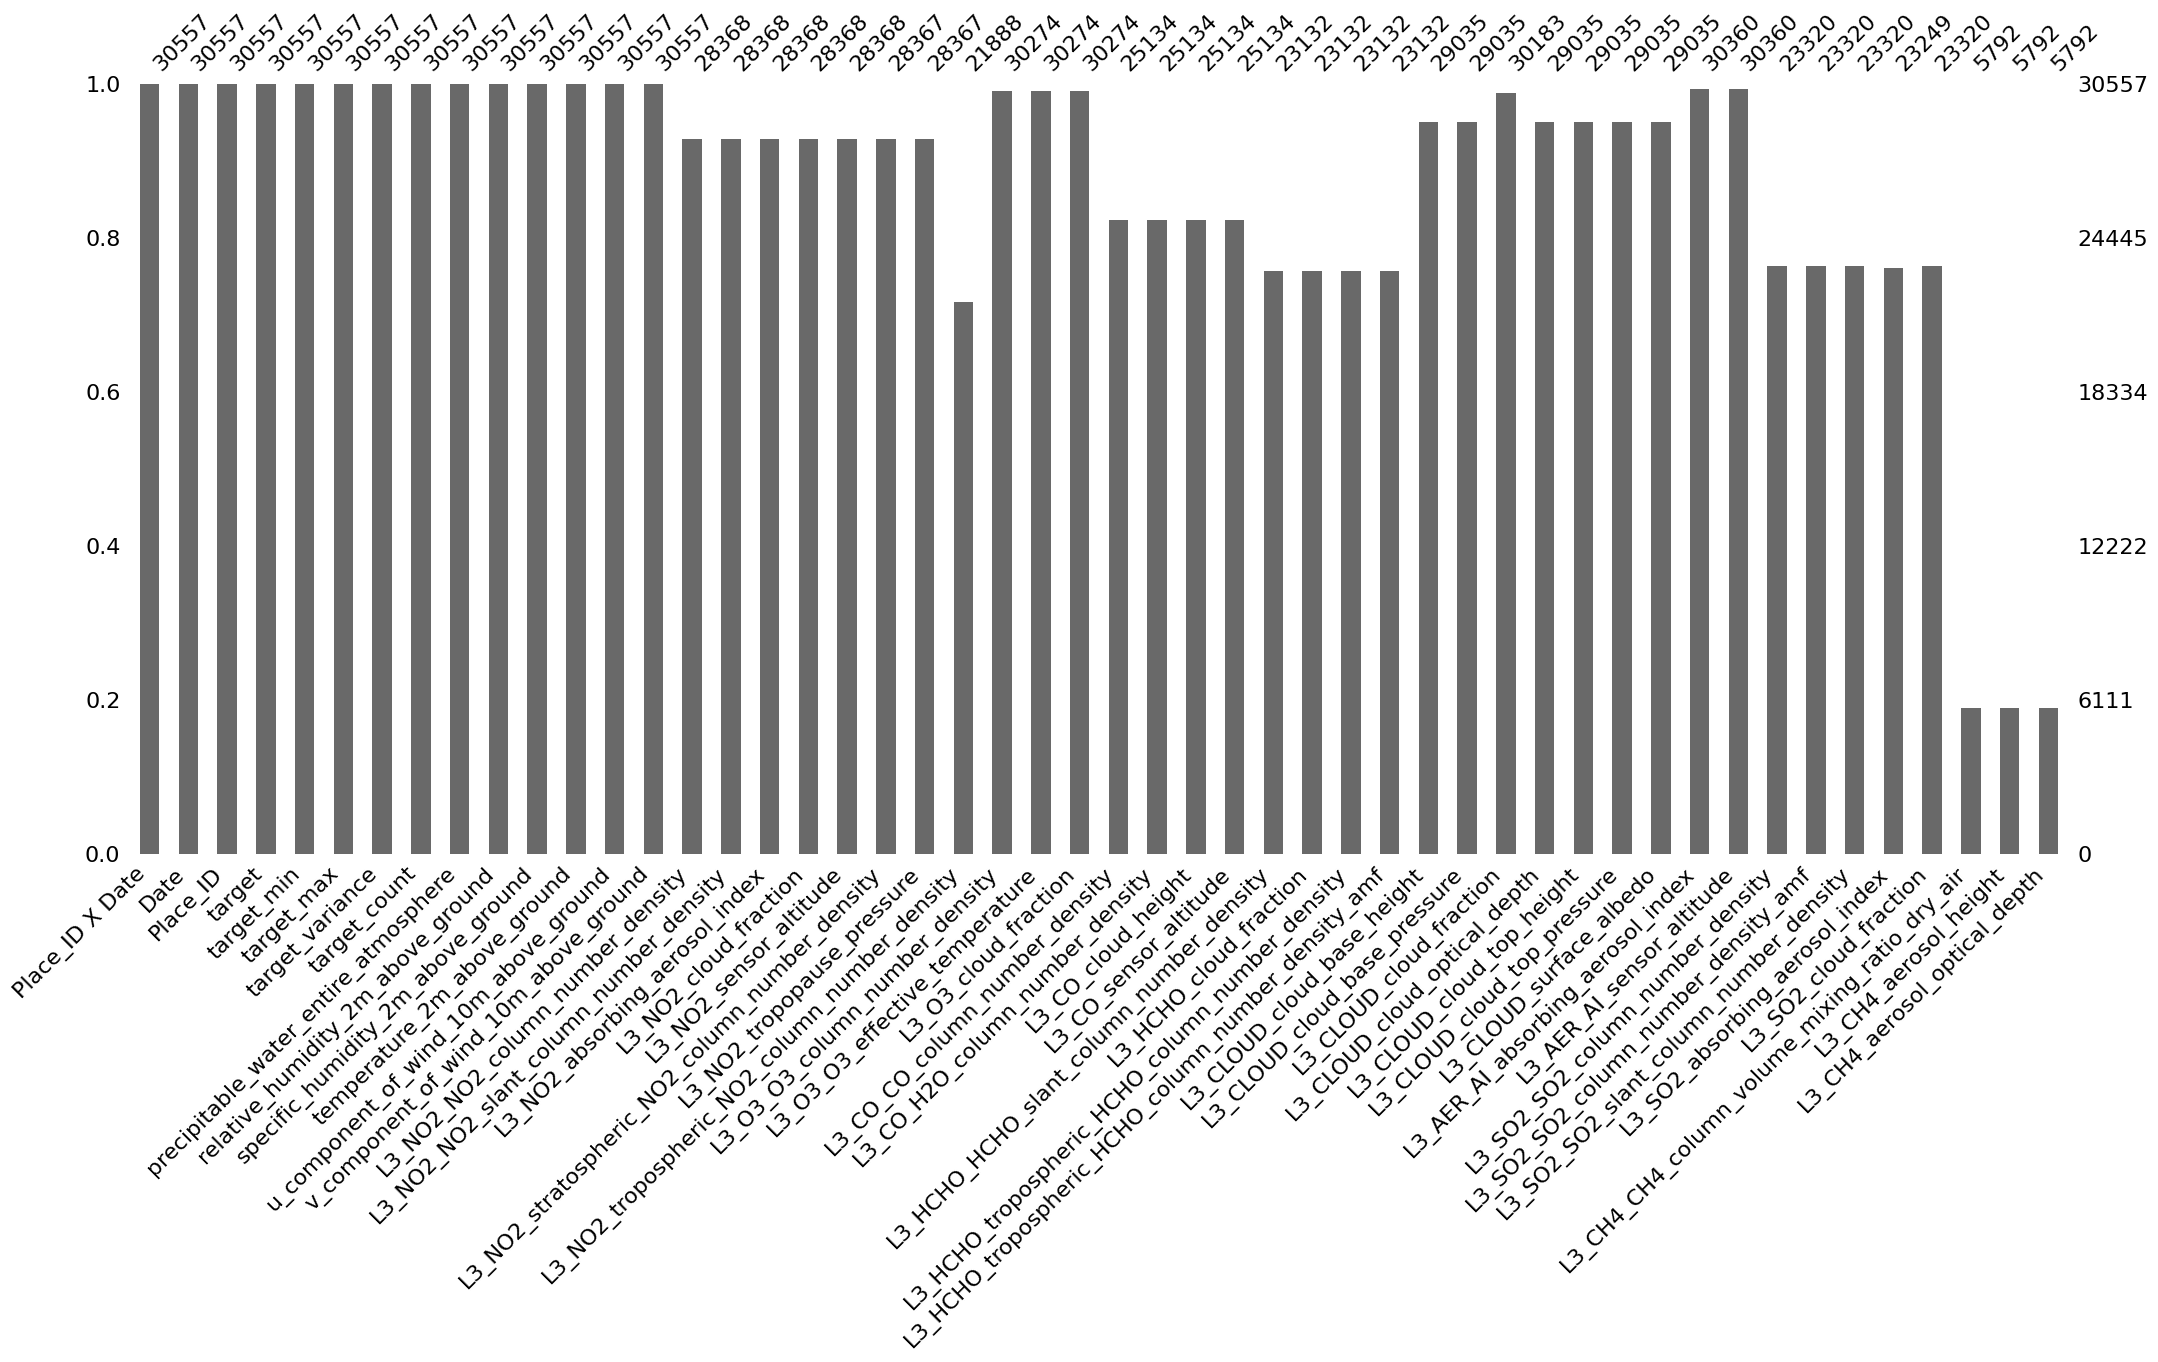

In [9]:
msno.bar(df_copy)

In [12]:
df_dens = df.filter(like='coloumn_number_density')
df_dens.head()

""
0
1
2
3
4


In [16]:
df_dens = df.loc[:, df.columns.str.contains('column_number_density', case=False)]
df_dens.head()

,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density
0,0.000074,0.000156,0.000057,0.000017,0.119095,0.021080,883.332451,-0.000010,0.000064,0.566828,-0.000127,0.312521,-0.000040
1,0.000076,0.000197,0.000055,0.000021,0.115179,0.022017,1148.985447,0.000114,0.000171,0.858446,0.000150,0.433957,0.000050
2,0.000067,0.000170,0.000059,0.000007,0.115876,0.020677,1109.347101,0.000027,0.000124,0.910536,0.000150,0.356925,0.000053
3,0.000083,0.000175,0.000060,0.000023,0.141557,0.021207,1061.570832,0.000023,0.000081,1.132571,0.000227,0.584522,0.000110
4,0.000070,0.000142,0.000062,0.000009,0.126369,0.037766,1044.247425,0.000037,0.000140,0.649359,0.000390,0.408047,0.000159


In [18]:
df_filtered = df.loc[:, ~((df.columns.str.startswith('L3')) & (~df.columns.str.contains('column_number_density')))]

df_filtered.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,0.000017,0.119095,0.021080,883.332451,-0.000010,0.000064,0.566828,-0.000127,0.312521,-0.000040
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,0.000021,0.115179,0.022017,1148.985447,0.000114,0.000171,0.858446,0.000150,0.433957,0.000050
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,0.000007,0.115876,0.020677,1109.347101,0.000027,0.000124,0.910536,0.000150,0.356925,0.000053
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,0.000023,0.141557,0.021207,1061.570832,0.000023,0.000081,1.132571,0.000227,0.584522,0.000110
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.000009,0.126369,0.037766,1044.247425,0.000037,0.000140,0.649359,0.000390,0.408047,0.000159


In [19]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 27 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul